In [36]:
! ls datasets/tmp


fire  nofire


In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [37]:
DATADIR = 'datasets/tmp'
CATEGORIES = ['fire', 'nofire']

In [38]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [39]:
training_data = create_training_data()


100%|██████████| 95/95 [00:07<00:00, 12.87it/s]


In [40]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

270
0
1
0
0
0
0
0
0
0
0


In [53]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

# try to get around split error
Y = np.asarray(Y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [54]:
type(Y)

numpy.ndarray

In [13]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [56]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)

#history = model.fit(X, Y, batch_size=27, epochs=10,validation_split=0.3)

Epoch 1/100
6/6 [==============================] - 0s 63ms/step - loss: 0.7027 - accuracy: 0.6138 - val_loss: 0.6885 - val_accuracy: 0.5679
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.6540 - accuracy: 0.6878 - val_loss: 0.6906 - val_accuracy: 0.5679
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6458 - accuracy: 0.6825 - val_loss: 0.6872 - val_accuracy: 0.5679
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6365 - accuracy: 0.6825 - val_loss: 0.6845 - val_accuracy: 0.5679
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6316 - accuracy: 0.6825 - val_loss: 0.6835 - val_accuracy: 0.5679
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6241 - accuracy: 0.6825 - val_loss: 0.6835 - val_accuracy: 0.5679
Epoch 7/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6224 - accuracy: 0.6825 - val_loss: 0.6701 - val_accuracy: 0.5679
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 26ms/step - loss: 0.1133 - accuracy: 0.9630 - val_loss: 0.2528 - val_accuracy: 0.8889
Epoch 60/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0986 - accuracy: 0.9683 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 61/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0546 - accuracy: 0.9894 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 62/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 63/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0551 - accuracy: 0.9735 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 64/100
6/6 [==============================] - 0s 26ms/step - loss: 0.1519 - accuracy: 0.9577 - val_loss: 0.6250 - val_accuracy: 0.5802
Epoch 65/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.0207 - val_accuracy: 0.9877
Epoch 66/100
6/6 [========

In [59]:
# model.save('TrainedModels/Fire-64x64-color-v7.1-soft.h5')
model.save('TrainedModels/take2.h5')

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


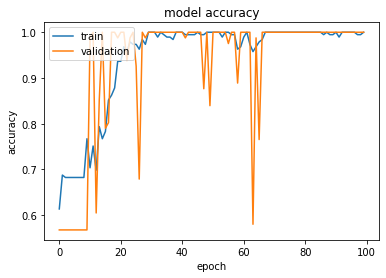

In [65]:
from matplotlib import pyplot as plt
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

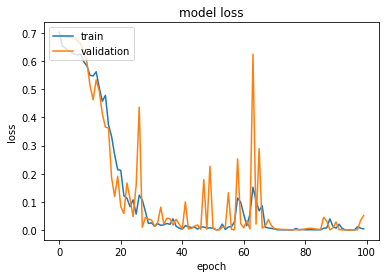

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [73]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
# model = tf.keras.models.load_model('TrainedModels/Fire-64x64-color-v7-soft.h5')
model = tf.keras.models.load_model('TrainedModels/take2.h5')

# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                   verbose=1)

In [83]:
plot_model(model, to_file='model_small.svg', show_layer_names=False, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [84]:
conda install pydotplus


NotWritableError: The current user does not have write permissions to a required path.
  path: /home/simbox/.conda/pkgs/urls.txt
  uid: 1000
  gid: 1000

If you feel that permissions on this path are set incorrectly, you can manually
change them by executing

  $ sudo chown 1000:1000 /home/simbox/.conda/pkgs/urls.txt

In general, it's not advisable to use 'sudo conda'.



Note: you may need to restart the kernel to use updated packages.
